## **Shrishti Manju** 

### **WEEK-5 Stock Price Prediction - Apple** 

In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 11.3 MB 29 kB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.2 which is incompatible.


     |████████████████████████████████| 109 kB 5.4 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


### **Importing Libraries**

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = web.DataReader('AAPL', data_source='yahoo',  start='2012-01-01', end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.610315
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.678085
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.818838
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.952841
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.932299
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.799057
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.969292
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.879601


In [3]:
df.shape

(2003, 6)

### **Visualise some of the attributes of the dataset.**

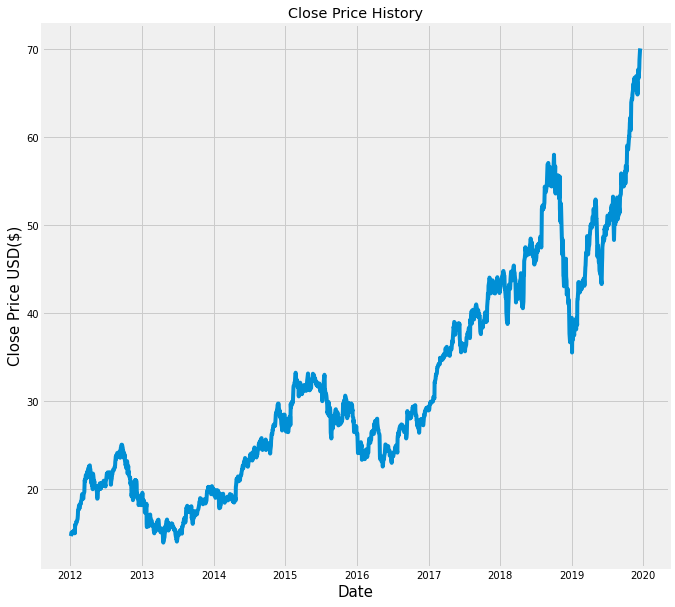

In [11]:
plt.figure(figsize=(10,10))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price USD($)',fontsize=15)
plt.show()

### **Observations:**
It can be observed that the plotted graph is highly non-linear and it is very difficult to understand the trend using this information. So that is why we will make use of LSTM. Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture. It can process not only single data points (such as images), but also entire sequences of data (such as speech or video). For example, LSTM is applicable to tasks such as unsegmented, connected handwriting recognition,speech recognition.

### **Split your whole dataset between training and testing dataset.**

In [13]:
data=df.filter(['Close'])
dataset=data.values
training_data_len= math.ceil(len(dataset) * .8)
training_data_len

1603

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [25]:
training_data = scaled_data[0:training_data_len, :]
print(len(training_data))
x_training, y_training = [], []

for i in range(100, len(training_data)):
  x_training.append(training_data[i-100:i, 0])
  y_training.append(training_data[i,0])
  if i<=101:
    print(x_training)
    print(y_training)

1603
[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805,
       0.13949272, 0.13293563, 0.14507041, 0.15186917, 0.14868284,
       0.15464214, 0.1562639 , 0.15130952, 0.14988489, 0.14770341,
       0.13654806, 0.12058461, 0.13939096, 0.13852602, 0

In [26]:
test_data = scaled_data[training_data_len: , :]
print(len(test_data))
x_test, y_test = [], []

for i in range(100, len(test_data)):
  x_test.append(test_data[i-100:i, 0])
  y_test.append(training_data[i,0])
  if i<=101:
    print(x_test)
    print(y_test)

400
[array([0.5840976 , 0.58107023, 0.58694685, 0.58485443, 0.59019677,
       0.58926183, 0.59117621, 0.58814884, 0.58636808, 0.58356332,
       0.59856648, 0.60564509, 0.61223397, 0.61521678, 0.61290181,
       0.60506631, 0.60297388, 0.60764846, 0.60061435, 0.60105957,
       0.59233369, 0.59188854, 0.57831003, 0.58191611, 0.5772861 ,
       0.574882  , 0.5626391 , 0.57270052, 0.57149854, 0.57746415,
       0.57572789, 0.58494342, 0.57043004, 0.57701893, 0.58846051,
       0.60008013, 0.5990562 , 0.58805984, 0.6020835 , 0.6034191 ,
       0.60154929, 0.60395332, 0.59927874, 0.6058677 , 0.60390882,
       0.60466565, 0.61085388, 0.61895648, 0.61624078, 0.60186089,
       0.59709732, 0.59878902, 0.64869556, 0.67491762, 0.67758883,
       0.68239696, 0.67367108, 0.67429435, 0.68155107, 0.6755409 ,
       0.68150651, 0.68542426, 0.68760575, 0.7013178 , 0.72028314,
       0.710845  , 0.70897512, 0.70901968, 0.71097855, 0.71396136,
       0.72188585, 0.72972128, 0.74432371, 0.75345025, 0.

In [27]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
print(x_train.shape, y_train.shape)

(1503, 100, 1) (1503,)


In [28]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape, y_test.shape)

(300, 100, 1) (300,)


### **Predict the stock prices using the following algorithms:**

### **1) RNN** 

In [29]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### **Training the LSTM Model**

In [38]:
lstm_model = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 64, epochs=100, verbose=1)

Epoch 1/100
24/24 [==============================] - 11s 232ms/step - loss: 0.0134 - val_loss: 0.3450
Epoch 2/100
24/24 [==============================] - 4s 182ms/step - loss: 9.3174e-04 - val_loss: 0.3577
Epoch 3/100
24/24 [==============================] - 4s 187ms/step - loss: 4.9025e-04 - val_loss: 0.3431
Epoch 4/100
24/24 [==============================] - 4s 183ms/step - loss: 4.8238e-04 - val_loss: 0.3586
Epoch 5/100
24/24 [==============================] - 4s 182ms/step - loss: 4.6499e-04 - val_loss: 0.3424
Epoch 6/100
24/24 [==============================] - 4s 186ms/step - loss: 4.5802e-04 - val_loss: 0.3454
Epoch 7/100
24/24 [==============================] - 4s 183ms/step - loss: 4.5142e-04 - val_loss: 0.3268
Epoch 8/100
24/24 [==============================] - 4s 183ms/step - loss: 4.3252e-04 - val_loss: 0.3467
Epoch 9/100
24/24 [==============================] - 4s 185ms/step - loss: 4.3996e-04 - val_loss: 0.3341
Epoch 10/100
24/24 [==============================] - 4s 1

Text(0, 0.5, 'Loss')

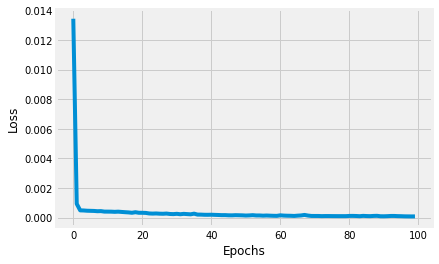

In [40]:
plt.plot(lstm_model.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

### **Predictions**

In [41]:
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

In [43]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
print(train_predictions.shape, test_predictions.shape)

(1503, 1) (300, 1)


### **Evaluation Metrics**

In [44]:
math.sqrt(mean_squared_error(y_train,train_predictions))

1627.1517218989025

In [45]:
math.sqrt(mean_squared_error(y_test,test_predictions))

2917.832902755343

In [55]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
rmse=np.sqrt( np.mean((predictions - y_test)**2))
rmse

51.63161075191078

### **Plot graph after prediction by using different colors to show predicted stocks.**

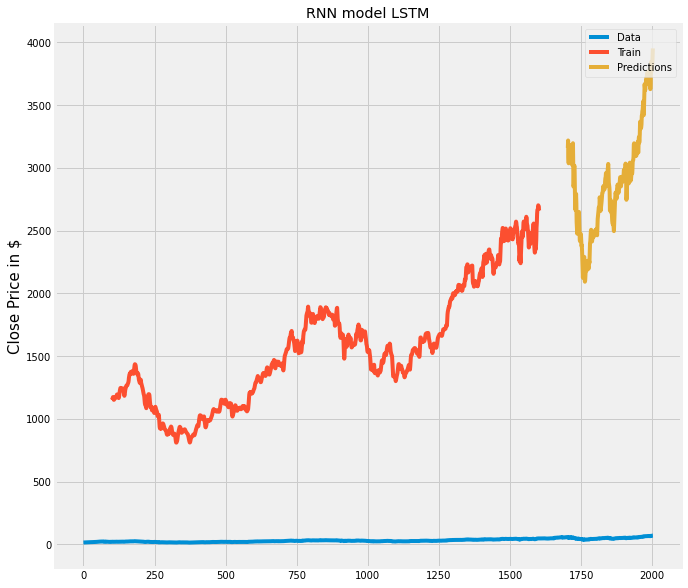

In [58]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[100:len(train_predictions)+100, :] = train_predictions
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan
testPredictPlot[len(train_predictions)+(100*2):len(dataset), :] = test_predictions
plt.figure(figsize = (10,10))
plt.title('RNN model LSTM')
plt.ylabel('Close Price in $', fontsize = 15)
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Data', 'Train', 'Predictions'], loc='upper right')
plt.show()